# Part 1 of 4: Get key packages and data

In [19]:
#-- get key packages

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

#-- get data

dataset_url = 'https://drive.google.com/uc?id=' + 'https://drive.google.com/file/d/1sD-MMZYho5ZAtV6mxqY05mwtVvg6zl-p/view?usp=sharing'.split('/')[-2]
df = pd.read_csv(dataset_url)

print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [36]:
#-- get target variable and features

y = df['diagnosis']

X = df.drop(['id','diagnosis','Unnamed: 32'], axis = 1)

features = list(X.columns)

# Part 2 of 4: Brief data exploration

In [21]:
#-- examine nulls in features

X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

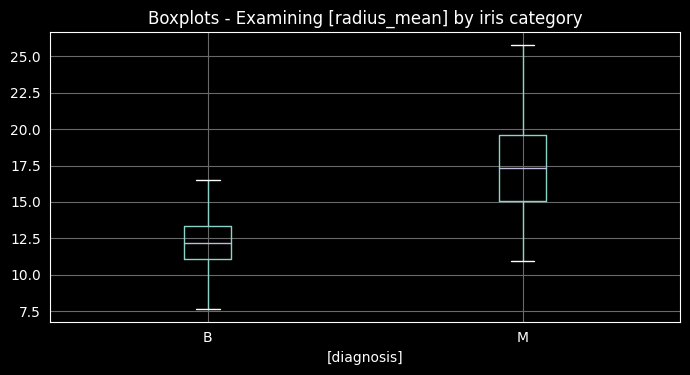

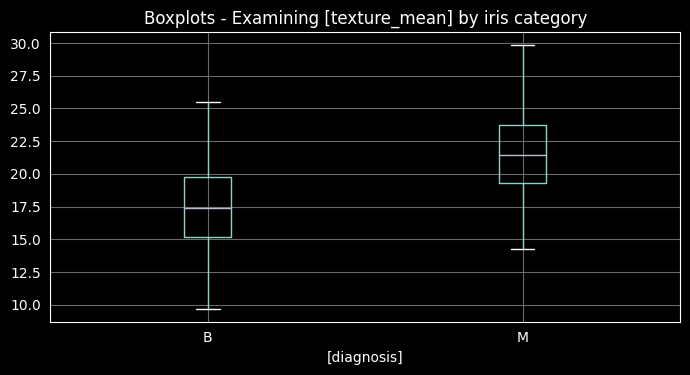

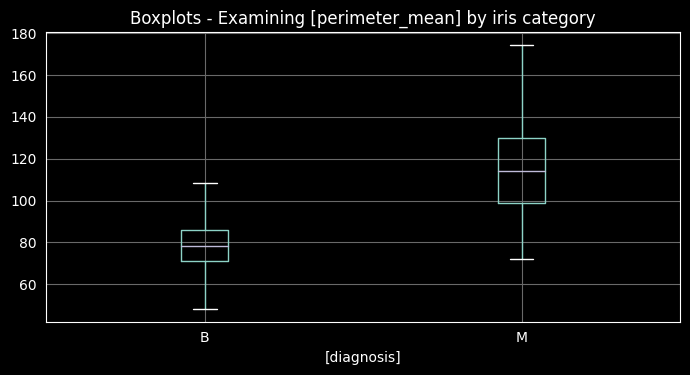

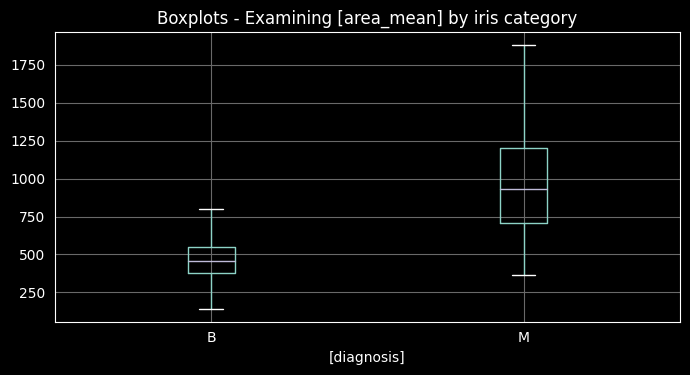

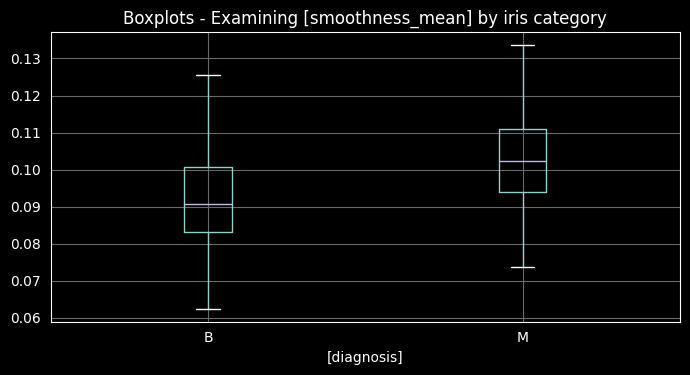

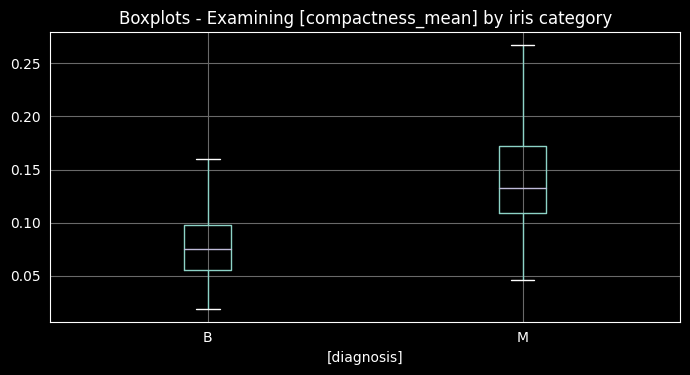

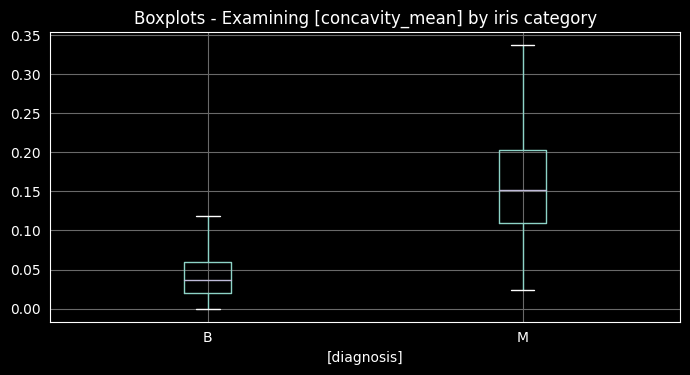

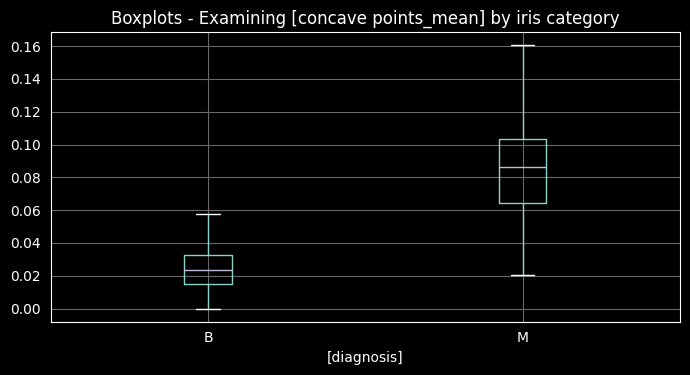

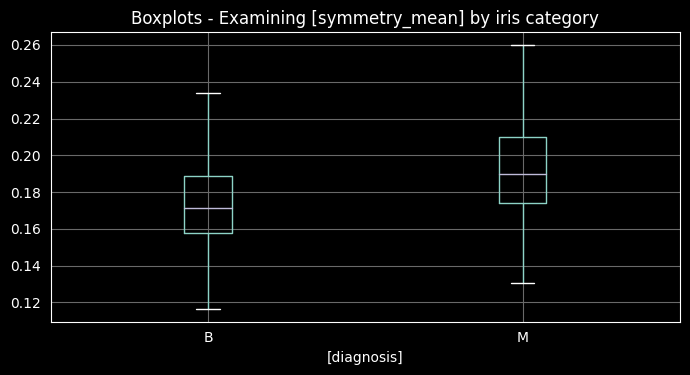

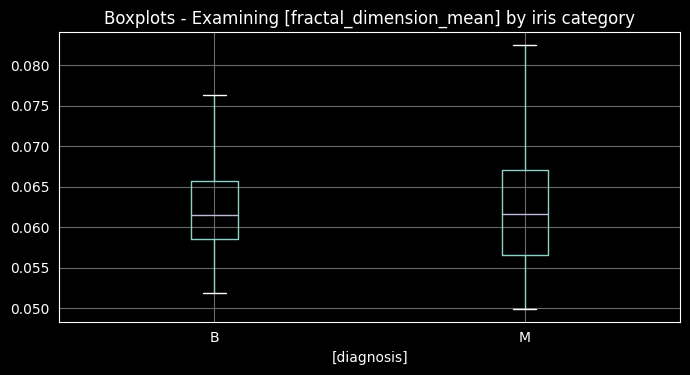

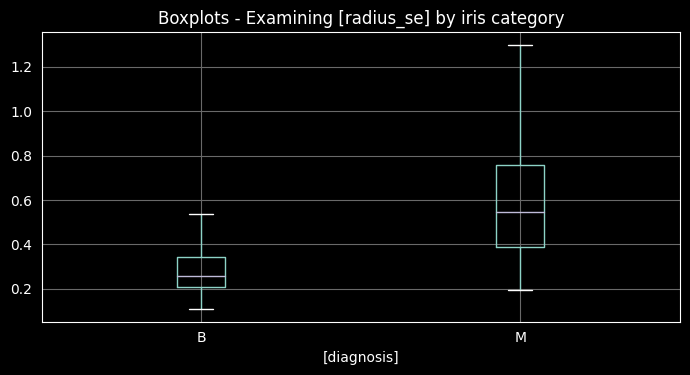

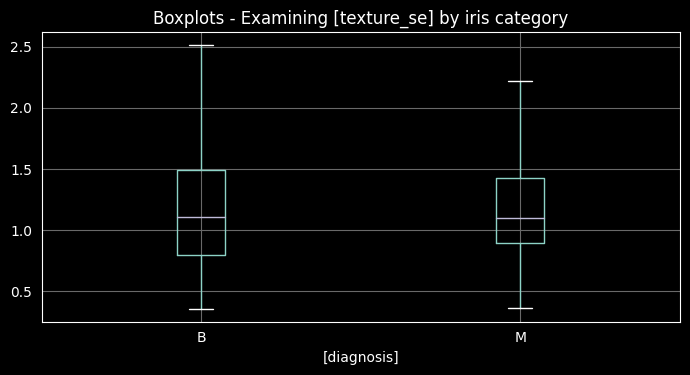

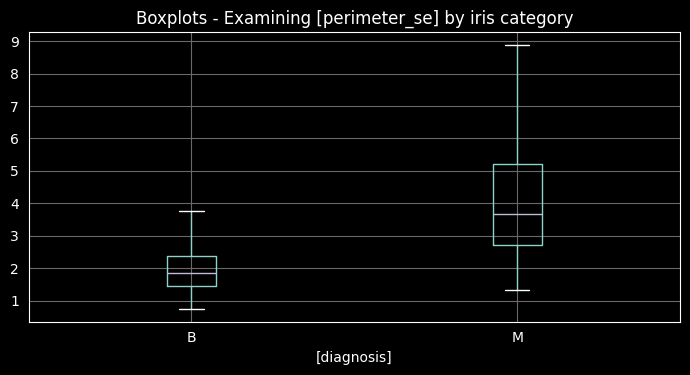

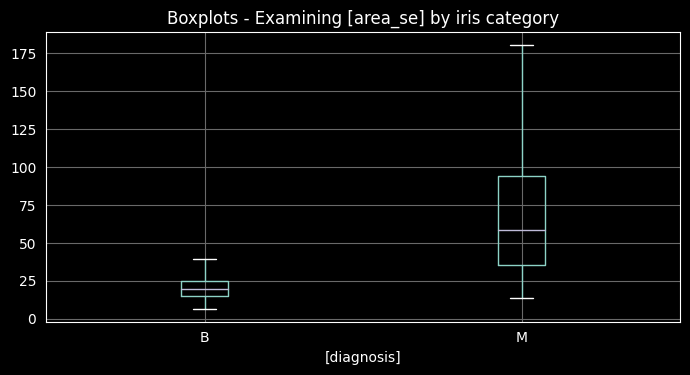

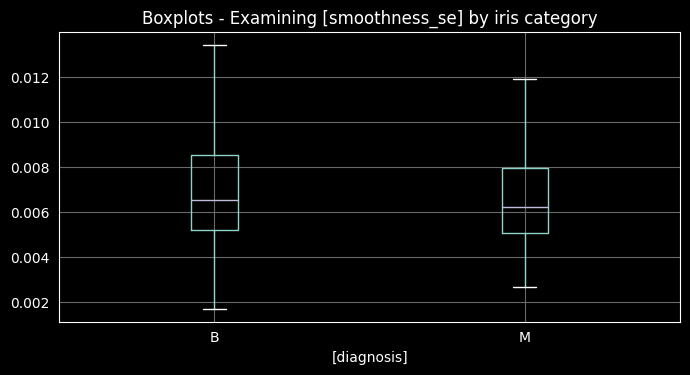

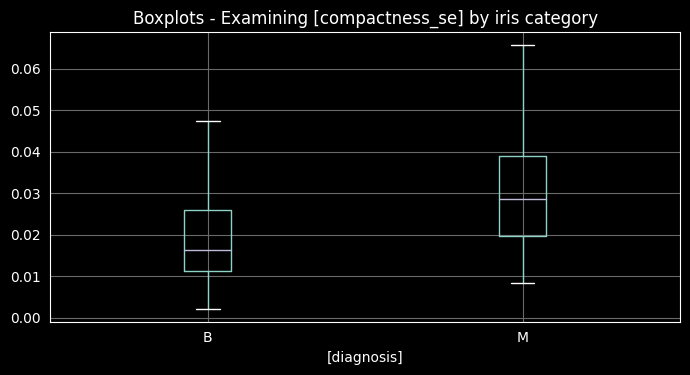

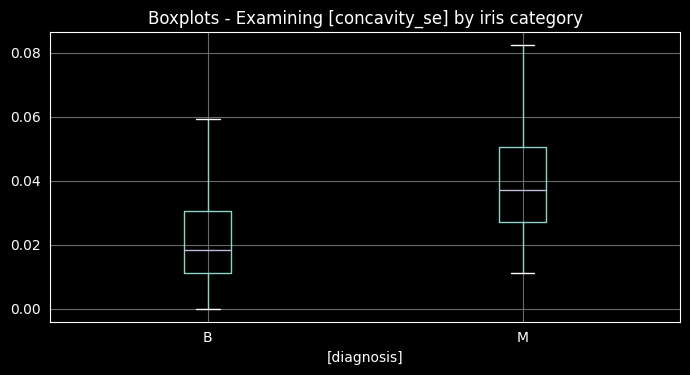

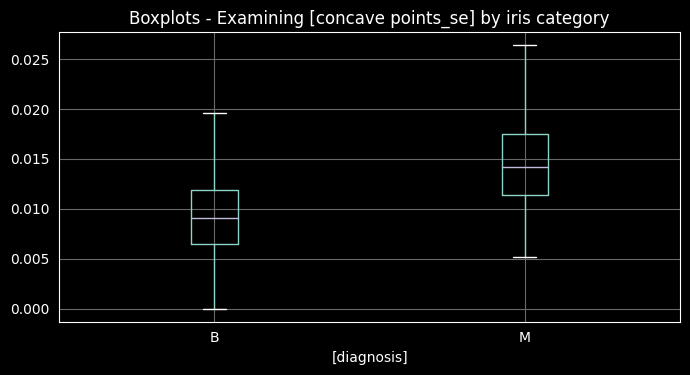

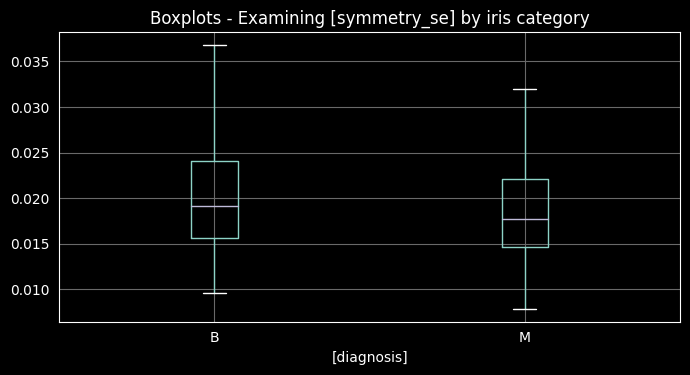

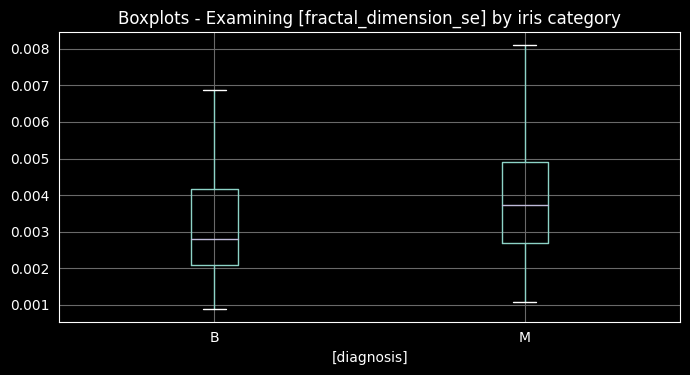

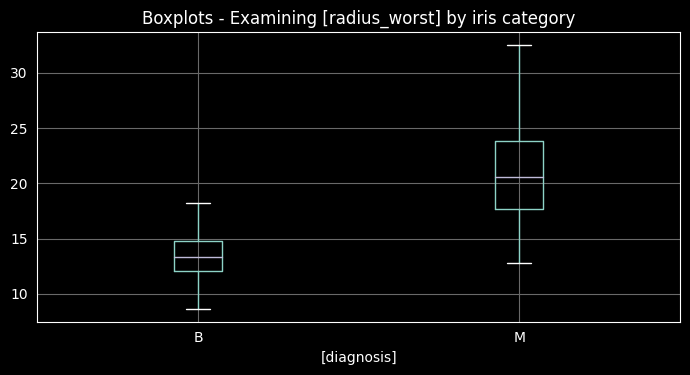

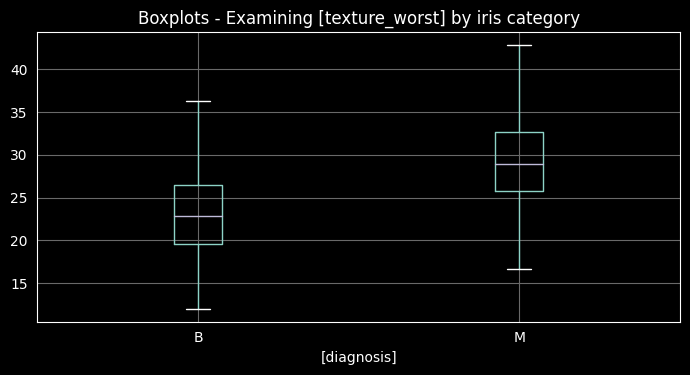

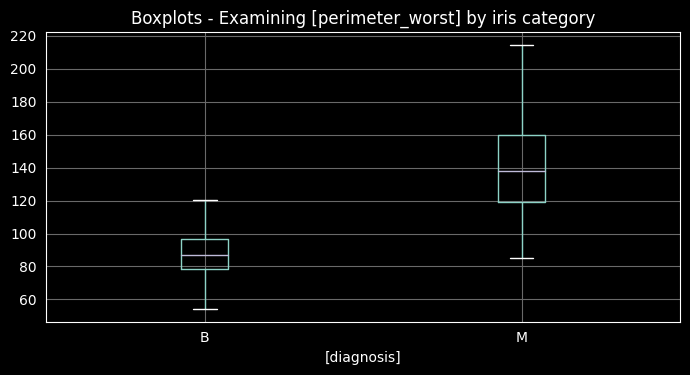

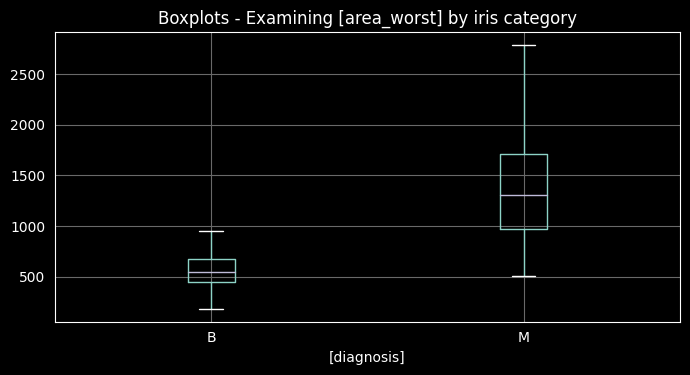

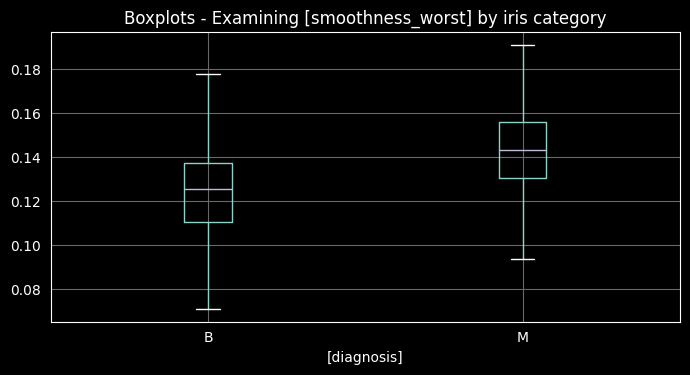

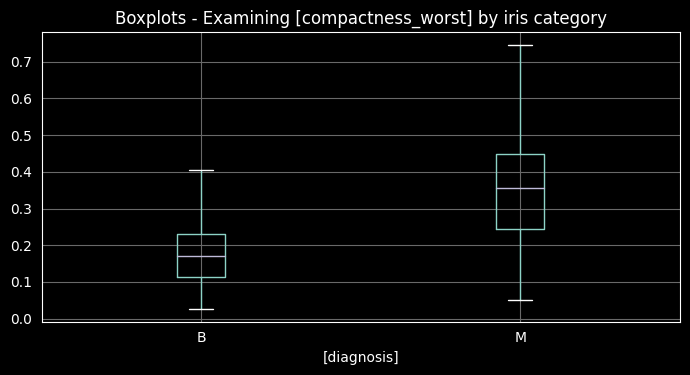

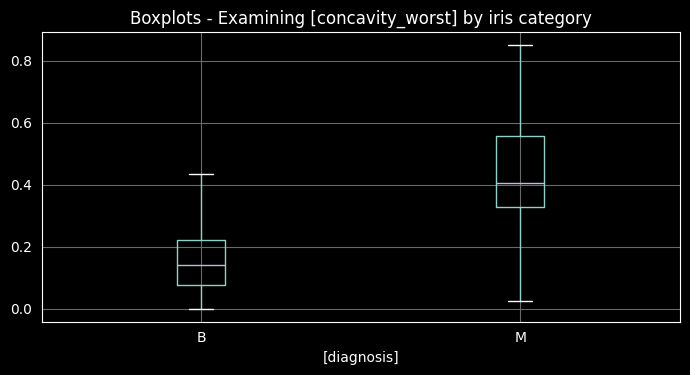

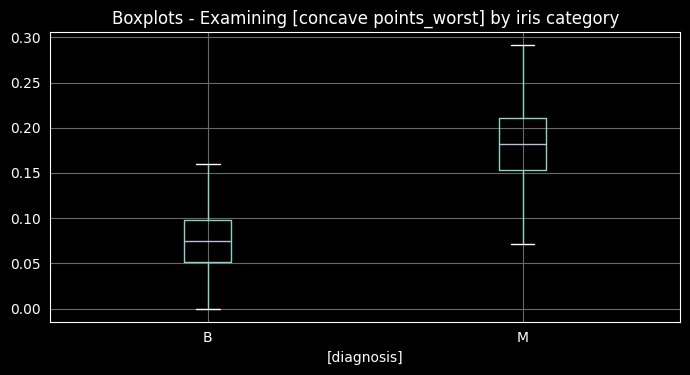

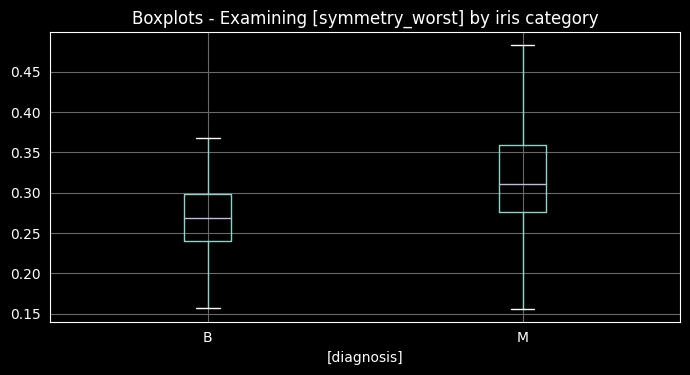

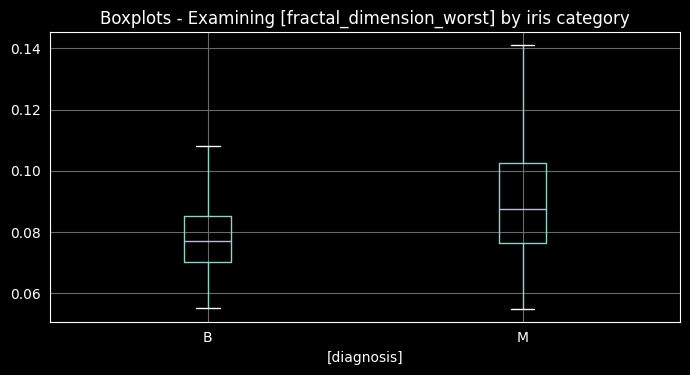

In [38]:
#-- exploring: view distribution of each feature by category of y (boxplots)

for x in features:

  from matplotlib import gridspec
  plt.style.use('dark_background')
  plt.style.context("dark_background")

  fig = plt.figure(figsize=(7, 4))
  gs = gridspec.GridSpec(1, 1, height_ratios=[1], width_ratios=[1])
  ax1 = plt.subplot(gs[0])

  plot_title = f'Boxplots - Examining [{x}] by iris category'

  df[[x,'diagnosis']].boxplot(by='diagnosis', ax=ax1, showfliers=False, capprops={'color': 'white'})
  ax1.set_title(plot_title)
  ax1.get_figure().suptitle("")

  ax1.grid(c='dimgray')

  plt.tight_layout()

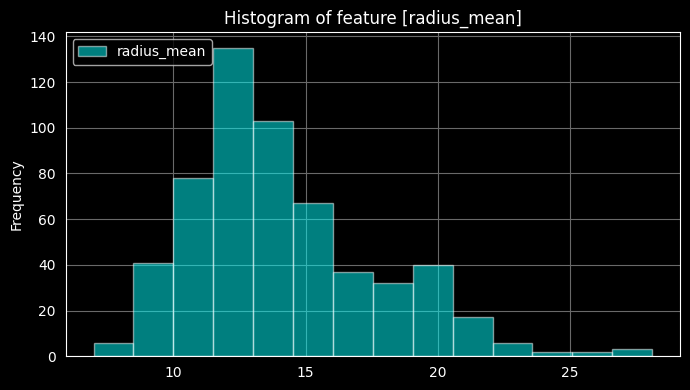

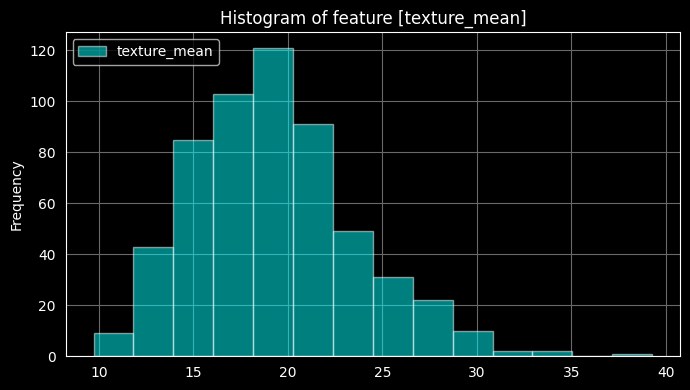

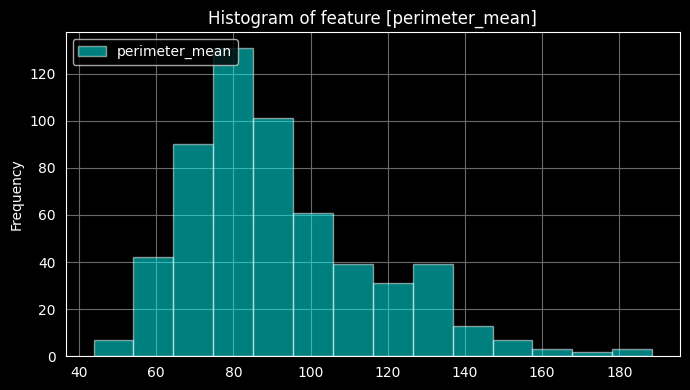

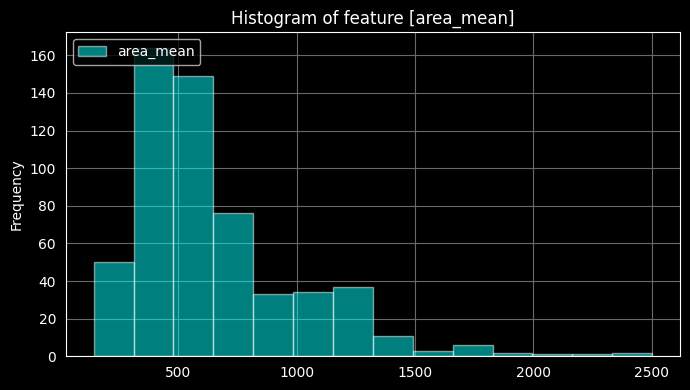

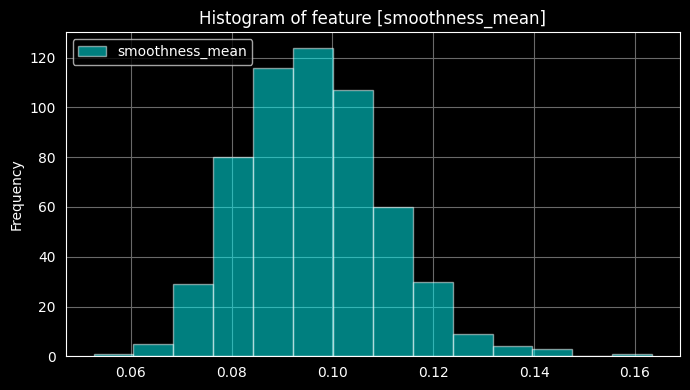

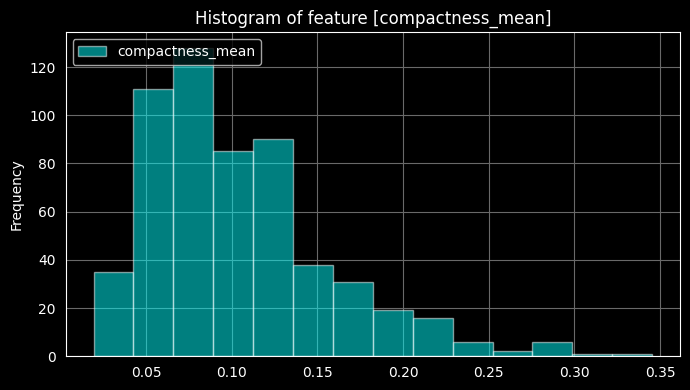

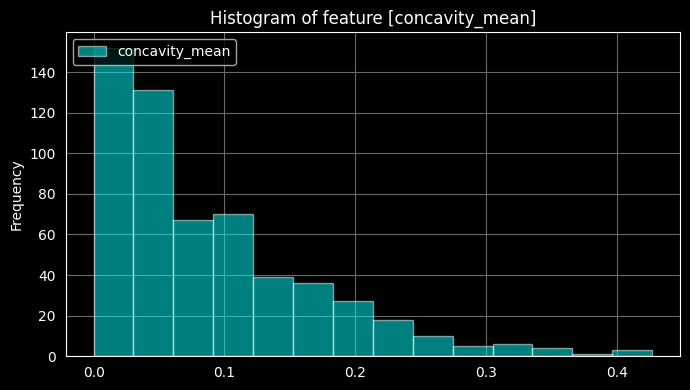

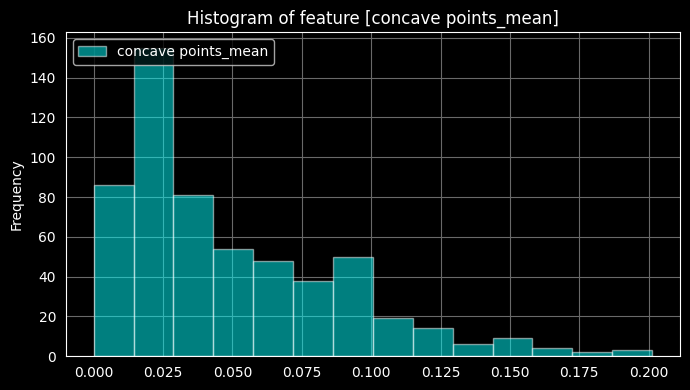

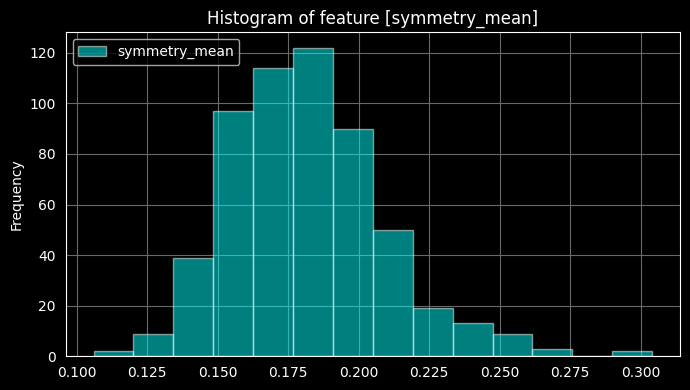

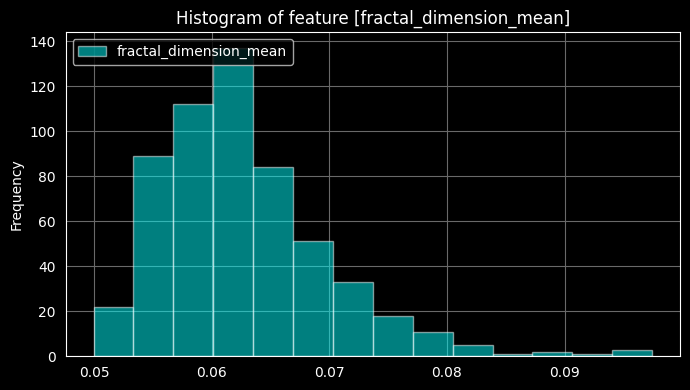

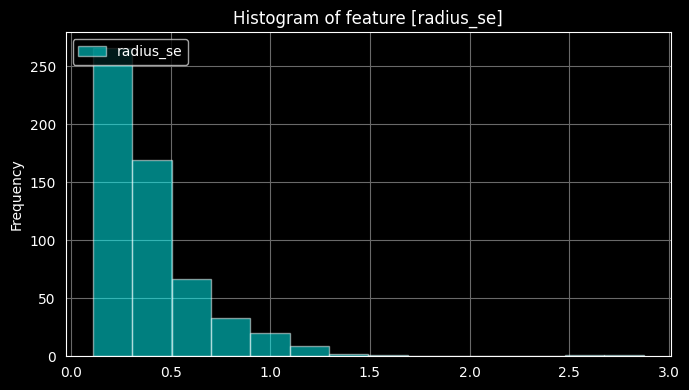

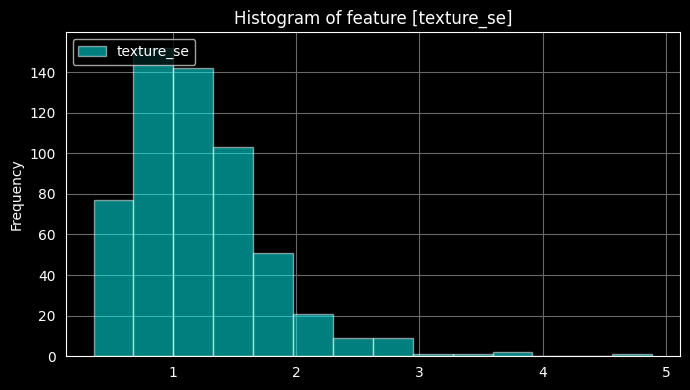

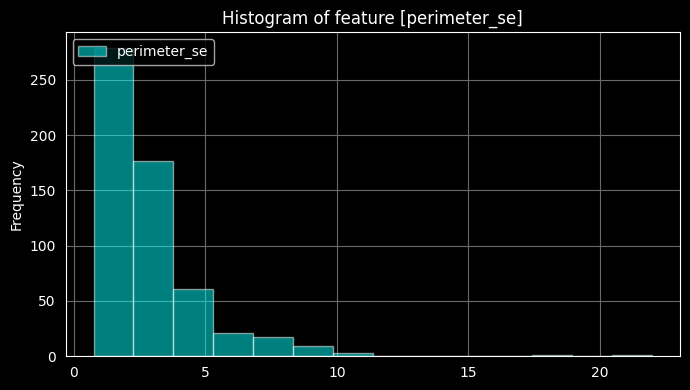

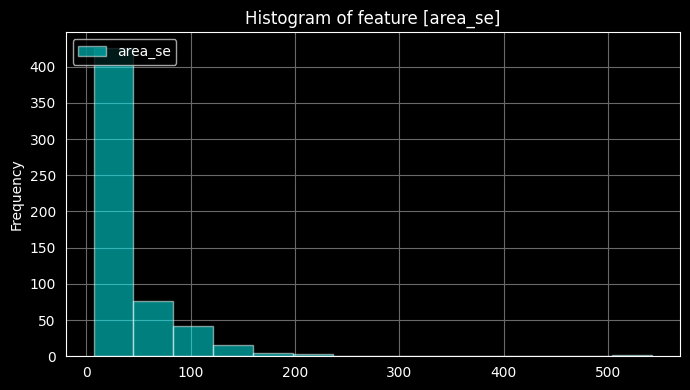

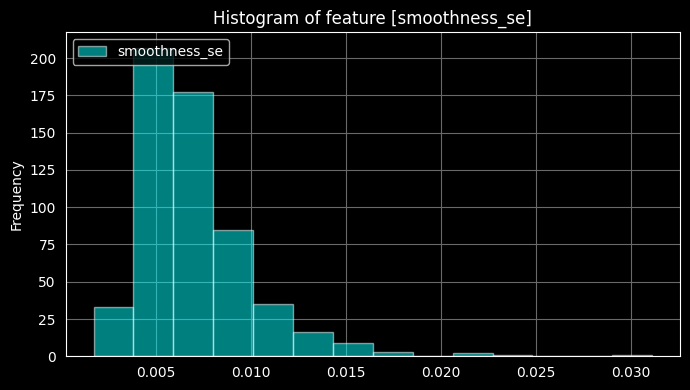

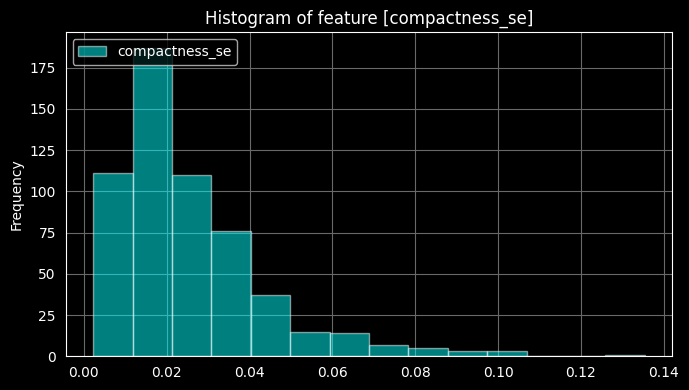

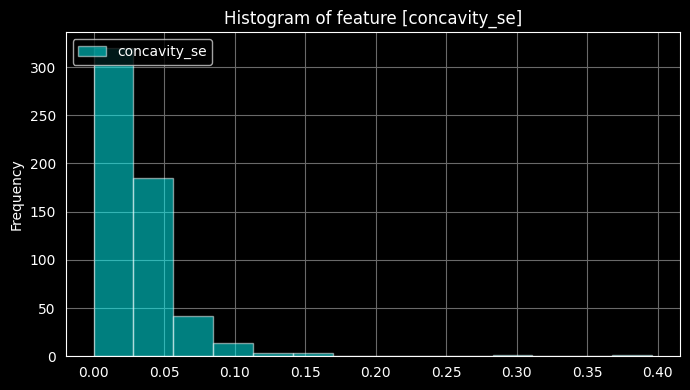

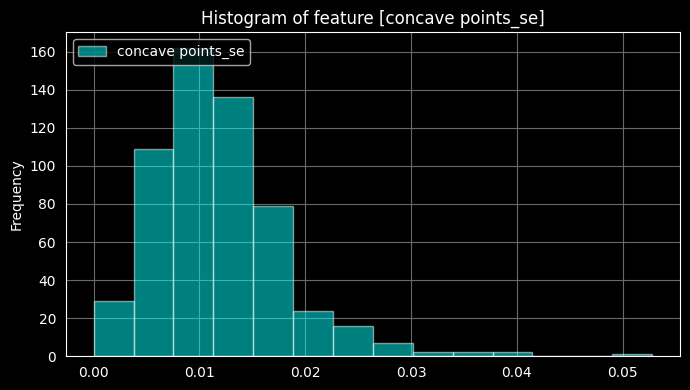

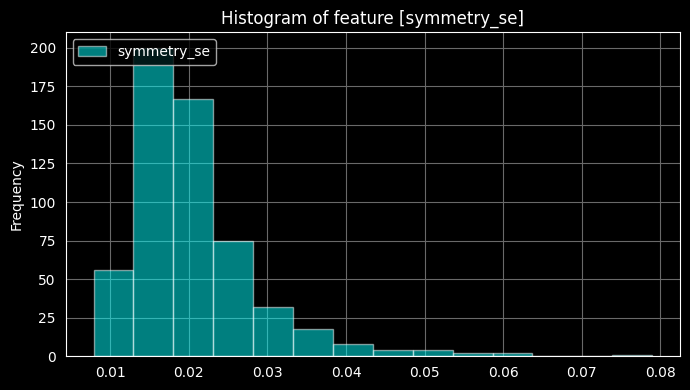

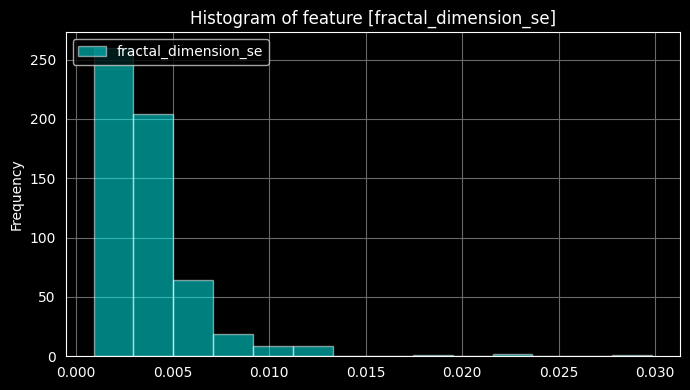

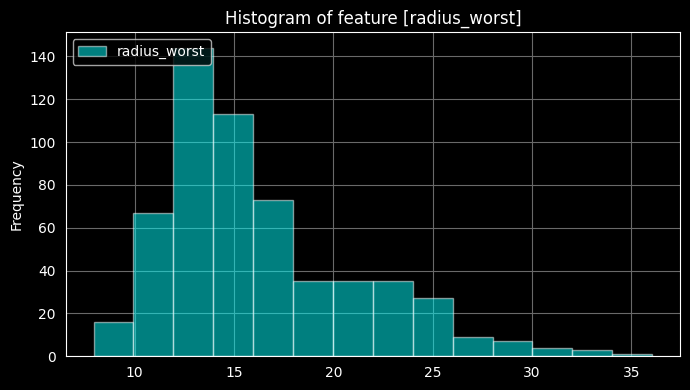

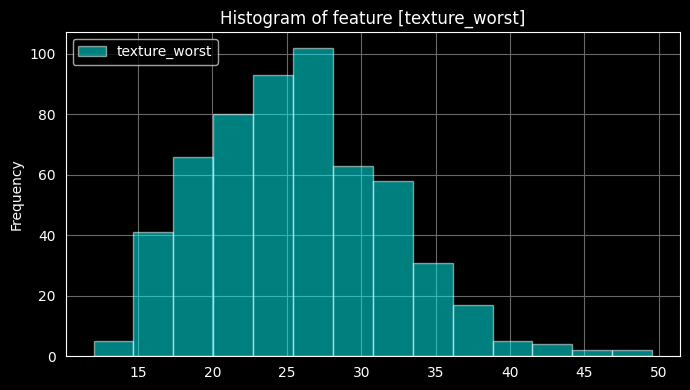

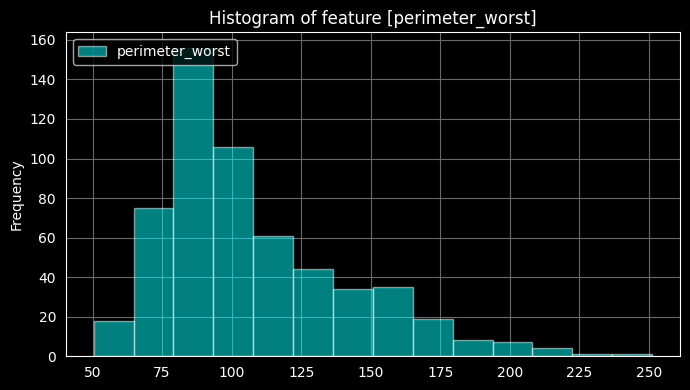

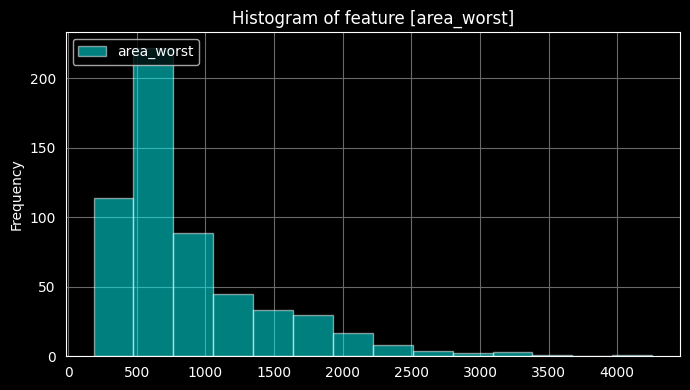

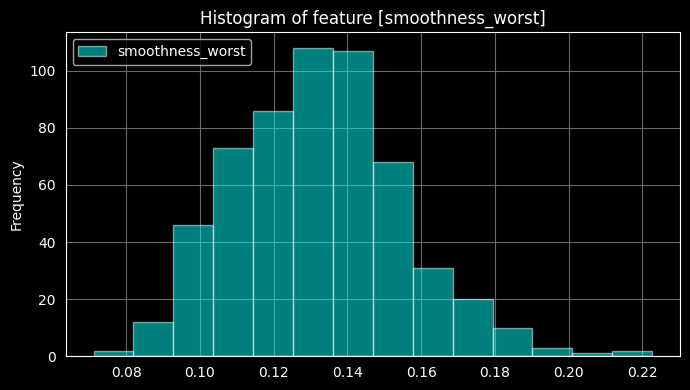

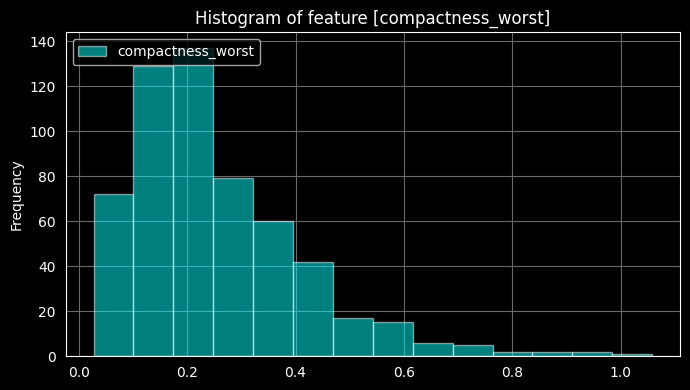

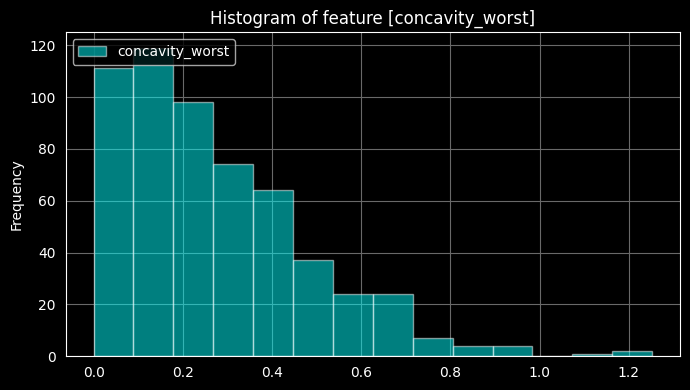

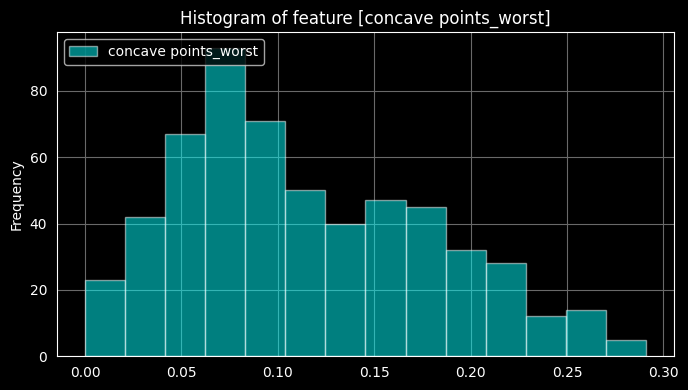

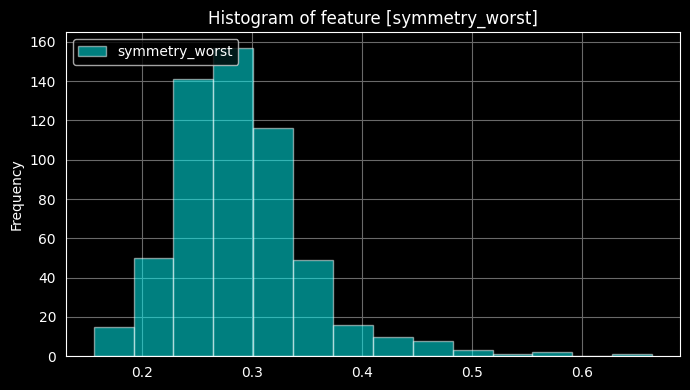

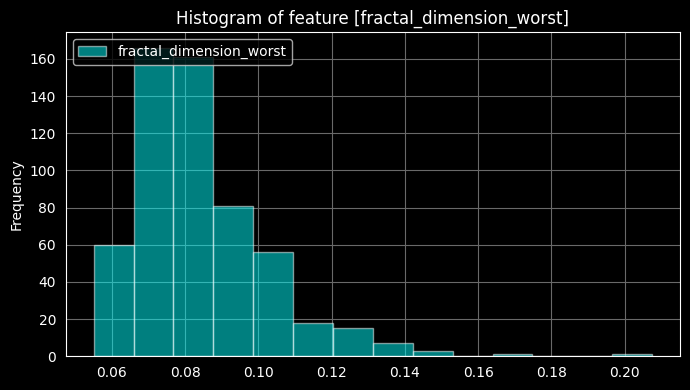

In [39]:
#-- exploring: view histogram of each potential feature

for x in features:

  from matplotlib import gridspec
  plt.style.use('dark_background')
  plt.style.context("dark_background")

  num_colors = 4
  color = plt.cm.cool(np.linspace(0, 1, num_colors))
  cyc = plt.cycler('color', color)
  plt.rc('axes', prop_cycle=cyc)

  fig = plt.figure(figsize=(7, 4))
  gs = gridspec.GridSpec(1, 1, height_ratios=[1], width_ratios=[1])
  ax1 = plt.subplot(gs[0])

  plot_title = f'Histogram of feature [{x}]'

  df[[x]].plot.hist(ax=ax1, bins=14, alpha=0.5, title=plot_title)

  ax1.grid(c='dimgray')
  ax1.yaxis.set_label_position("left")
  plt.legend(loc='upper left')

  plt.tight_layout()


# Part 3 of 4: Try a model

In [23]:
#-- try a simple model

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=11)

model = LogisticRegression()

model.fit(X_train, y_train)

y_preds_test = model.predict(X_test)

mean_acc_score = model.score(X_test, y_test)
f1_WeightedAvg = f1_score(y_test, y_preds_test, average='weighted')
model_class_report = classification_report(y_test, y_preds_test)

print('### View performance metrics')
print(f'# mean_acc_score: {mean_acc_score:.3f}')
print(f'# f1_WeightedAvg: {f1_WeightedAvg:.3f}')
print('# classification report:')
print(model_class_report)


### View performance metrics
# mean_acc_score: 0.939
# f1_WeightedAvg: 0.938
# classification report:
              precision    recall  f1-score   support

           B       0.94      0.97      0.95        76
           M       0.94      0.87      0.90        38

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



# Part 4 of 4: Perform hyperparameter tuning

In [32]:
#-- perform hyperparameter tuning

param_grid = [
    {'penalty' : ['l2', 'elasticnet'],
    'C' : [0.1, 0.5, 1],
    'solver' : ['lbfgs','liblinear','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

def my_roc_auc_score(model, X, y):
  return roc_auc_score(y, model.predict_proba(X)[:, 1])

clf = GridSearchCV(model,
                   param_grid = param_grid,
                   scoring=my_roc_auc_score,
                   return_train_score=True,
                   verbose=1)

best_clf = clf.fit(X, y)

df_cv_results = pd.DataFrame(best_clf.cv_results_)

print(df_cv_results.head())


Fitting 5 folds for each of 72 candidates, totalling 360 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.033320      0.003256         0.000257        0.000031     0.1   
1       0.012646      0.003117         0.000300        0.000015     0.1   
2       0.030485      0.007329         0.000228        0.000051     0.1   
3       0.000886      0.000086         0.000000        0.000000     0.1   
4       0.000638      0.000015         0.000000        0.000000     0.1   

  param_max_iter param_penalty param_solver  \
0            100            l2        lbfgs   
1            100            l2    liblinear   
2            100            l2         saga   
3            100    elasticnet        lbfgs   
4            100    elasticnet    liblinear   

                                              params  split0_test_score  ...  \
0  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', '...                NaN  ...   
1  {'C': 0.1, 'max_iter': 100, 'penalty': 'l

In [35]:
#-- evaluate best performing model

df_cv_results.sort_values(by='mean_test_score', ascending=False, inplace=True)

best_penalty = df_cv_results['param_penalty'].iloc[0]
best_C = df_cv_results['param_C'].iloc[0]
best_solver = df_cv_results['param_solver'].iloc[0]
best_max_iter = df_cv_results['param_max_iter'].iloc[0]

model = LogisticRegression(penalty=best_penalty, C=best_C, solver=best_solver, max_iter=best_max_iter)

model.fit(X_train, y_train)

y_preds_test = model.predict(X_test)

mean_acc_score = model.score(X_test, y_test)
f1_WeightedAvg = f1_score(y_test, y_preds_test, average='weighted')
model_class_report = classification_report(y_test, y_preds_test)

print('### View performance metrics')
print(f'# mean_acc_score: {mean_acc_score:.3f}')
print(f'# f1_WeightedAvg: {f1_WeightedAvg:.3f}')
print('# classification report:')
print(model_class_report)


### View performance metrics
# mean_acc_score: 0.947
# f1_WeightedAvg: 0.947
# classification report:
              precision    recall  f1-score   support

           B       0.94      0.99      0.96        76
           M       0.97      0.87      0.92        38

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

